In [173]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [174]:
def df_info(data):
    print(data.shape)
    data.hist(figsize=(20, 5), layout=(-1, 5))
    display(data.sample(3))

# 2.2.4

In [175]:
df = pd.read_csv('../data/driver_info.csv')

(15153, 7)


,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
8124,37,8.8,703,10.0,b11156665q,0,2020-8-15
12388,21,9.6,212,NaN,R14966310L,1,2020-4-8
11819,20,8.4,1514,19.0,K35668290z,1,2018-7-15


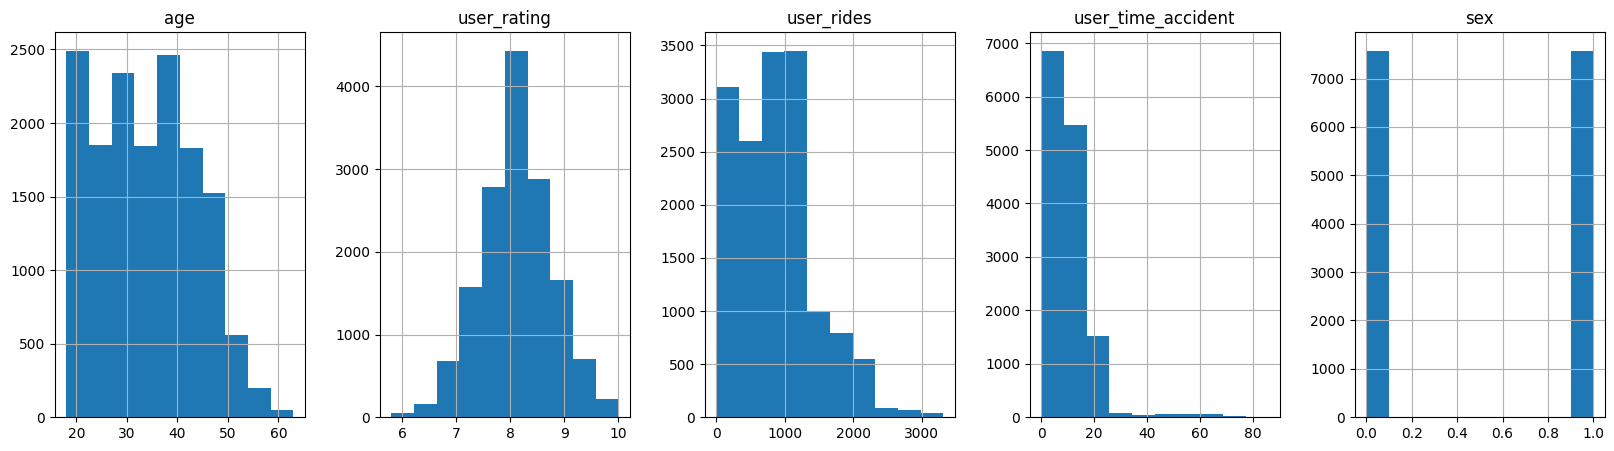

In [176]:
df_info(df)

In [177]:
df.describe()

,age,user_rating,user_rides,user_time_accident,sex
count,15153.000000,15153.000000,15153.000000,14182.000000,15153.000000
mean,33.581073,8.109345,871.015442,10.129601,0.499967
std,9.919271,0.668246,573.512378,8.867482,0.500016
min,18.000000,5.800000,0.000000,0.000000,0.000000
25%,25.000000,7.700000,421.000000,4.000000,0.000000
50%,33.000000,8.100000,876.000000,9.000000,0.000000
75%,41.000000,8.600000,1145.000000,14.000000,1.000000
max,63.000000,10.000000,3316.000000,86.000000,1.000000


In [178]:
df.value_counts('sex')

sex
0    7577
1    7576
Name: count, dtype: int64

# 2.2.6

In [179]:
df1 = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.6_df1.csv', index_col=0)
df2 = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.6_df2.csv', index_col=0)
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_6_ans.csv', index_col=0)

In [180]:
# Учтите, что user_white_list и car_black_list в тестовой системе будут иметь другую длину и другие значения
user_white_list = ['g10995906g', 'H90312511Q', 'C27138482L', 'H22518078t', 'n17438464n', 'F10525768e', 's15596151o',
                   'i18954748S', 'E84048392U', 'E69893354s']
car_black_list = ['e78313402L', 'z30508487R']  #['l-4285389z', 'n79502261g', 'N-1839822D']

(180, 4)


,user_id,car_id,rating,stop_times
177,u27817291l,Z11671085y,5.93,0
144,P10646529U,X-1992655I,2.94,6
133,i82515361F,I-2258340t,4.44,18


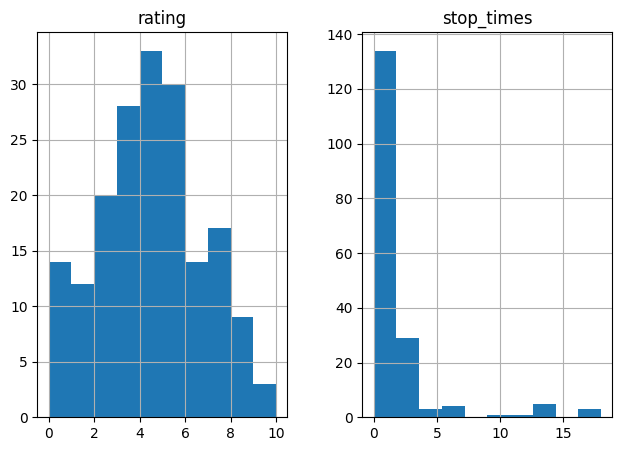

In [181]:
df_info(df1)

(120, 4)


,user_id,car_id,rating,stop_times
201,E17159805p,f19927901y,5.58,2
198,d69804073L,F14265516N,3.49,1
205,j99167213w,T-9114355z,5.17,1


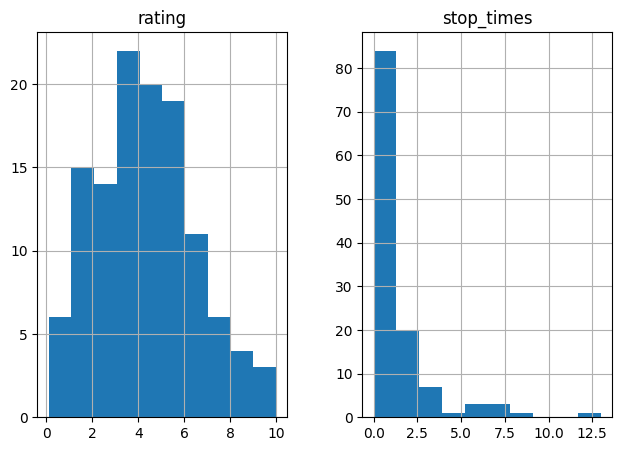

In [182]:
df_info(df2)

In [183]:
df3 = pd.concat([df1, df2], axis=0)

(300, 4)


,user_id,car_id,rating,stop_times
105,R21030662a,u-1444692P,7.33,0
235,O14051668g,R-6844153a,5.43,0
204,N65016137n,C11147530X,2.95,6


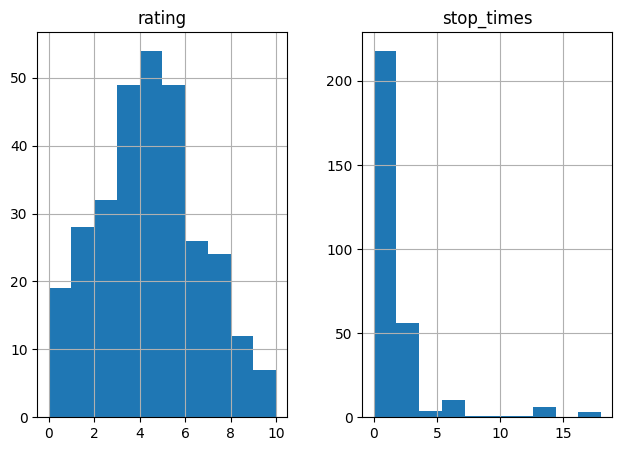

In [184]:
df_info(df3)

In [185]:
# Оставить только строки, где rating > 4 и stop_times равен 2, 3 или 5.
tmp = df3[(df3['rating'] > 4) & (df3['stop_times'].isin([2, 3, 5]))].copy()

In [186]:
# В получившемся датафрейме оставить только те строки,
#   - где car_id не входит в список car_black_list
#   - и user_id входит в список user_white_list.
tmp = tmp[(~tmp['car_id'].isin(car_black_list)) & (tmp['user_id'].isin(user_white_list))].copy()

In [187]:
# Оставить только строки, где index чётное число (датафрейм проиндексирован целыми числами).
result = tmp.filter(items=[i for i in tmp.index if i % 2 == 0], axis=0).copy()  # OR result[result.index % 2 == 0]

In [188]:
result

,user_id,car_id,rating,stop_times
20,C27138482L,M-1786506l,7.42,2
190,F10525768e,I98930031r,4.21,2
248,s15596151o,u-2070489i,5.39,2


# 2.2.7

In [189]:
# Сколько водителей имеет количество инцидентов (user_time_accident) на полуинтервале (4.5, 9.0] и age < 40?
df[(df['age'] < 40) & (df['user_time_accident'] > 4.5) & (df['user_time_accident'] <= 9.0)]['user_id'].nunique()

2478

# 2.2.8

In [190]:
df8 = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_8.csv')
ans8 = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_8_ans.csv', index_col=0)

In [191]:
# Создайте столбец tripple_accident из столбца user_time_accident, умноженного на 3.
df8['tripple_accident'] = df8['user_time_accident'] * 3

In [192]:
# Создайте столбец rides_on_rating делением столбца user_rides на user_rating.
df8['rides_on_rating'] = df8['user_rides'] / df8['user_rating']

In [193]:
# Оставьте только те строки, у которых user_time_accident больше 25 (используем фильтрацию).
df81 = df8[df8['user_time_accident'] > 25].copy()

In [194]:
# Оставьте только те строки, у которых age выше среднего значения по полученной таблице в предыдущем пункте.
df81[df81['age'] > df81['age'].mean()]

,user_id,user_rating,age,user_rides,user_time_accident,tripple_accident,rides_on_rating
3,E10711310m,8.4,33,322,39.0,117.0,38.333333
64,t25217963K,8.0,30,101,72.0,216.0,12.625000


In [195]:
ans8

,user_id,user_rating,age,user_rides,user_time_accident,tripple_accident,rides_on_rating
3,E10711310m,8.4,33,322,39.0,117.0,38.333333
64,t25217963K,8.0,30,101,72.0,216.0,12.625000


# 2.2.10

In [196]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_10.csv')
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_10_ans.csv')

In [197]:
# Учтите, что new_index, new_data, del_index_list, index в тестовой системе будут иметь другие значения
new_index = 50
new_data = ['new_car_id', 'new_worker_id', '2019-11-11 4:44', 'refuel_check', 3.5, 10]
del_index_list = [41, 18, 33, 7, 46]
index = 22

In [198]:
print(df.shape)
df.sample(3)

(50, 6)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
32,n31468349R,IP,2019-11-23 11:48,reparking,8.0,41
21,E-1829228V,MD,2019-2-22 14:34,repair,3.8,5
40,j51305093b,HP,2019-2-29 7:0,reparking,1.0,28


In [199]:
# Добавьте новую строку (с индексом new_index:(int / str) и значениями new_data:list).
df.loc[new_index] = new_data

In [200]:
# Удалите строки с индексами из списка del_index_list: list.
df.drop(del_index_list, inplace=True, axis=0)

In [210]:
# Увеличьте значение destroy_degree на 1 в строке с индексом равным index. Переменная index содержит индекс строки ИЛИ число (индекс).
df.loc[index, 'destroy_degree'] += 1

In [212]:
# Удалите столбец fix_date, т.к. не стоит сейчас думать о времени.
df.drop('fix_date', axis=1, inplace=True)

In [214]:
# Создайте новый столбец efficient, который равен destroy_degree деленный на work_duration.
df['efficient'] = df['destroy_degree'] / df['work_duration']

In [218]:
# Возведите столбец work_duration в квадрат.
df['work_duration'] = df['work_duration'] ** 2

In [223]:
# Переименуйте столбец work_duration в work_duration_square.
df.rename(columns={'work_duration': 'work_duration_square'}, inplace=True)

In [225]:
# Удалите дубликаты по столбцу car_id.
df.drop_duplicates(subset=['car_id'], inplace=True)

# 2.2.11

In [293]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.11.csv')
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_11_ans.csv', index_col=0)

sort_by_list = ['car_rating', 'riders']
cols2drop = ['random_name_1', 'target_reg', 'target_class', 'random_name_2']
columns_order_list = ['model', 'car_type', 'car_id', 'car_rating', 'year_to_start', 'year_to_work', 'riders',
                      'fuel_type']
critical_car_rating = 2

In [294]:
print(df.shape)
df.sample(3)

(300, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
72,j92079780S,Smart ForTwo,economy,petrol,4.16,2017,120482,2015,23.191820,wheel_shake
218,z-2843006O,Smart ForFour,economy,petrol,4.54,2013,43143,2016,29.050019,wheel_shake
33,f11353067l,VW Tiguan,economy,petrol,4.26,2017,117865,2022,64.752116,another_bug


In [304]:
# Отсортируйте строки сначала по убыванию 1-го столбца из списка sort_by_list, затем по возрастанию 2-го столбца из списка.
df.sort_values(by=sort_by_list[0], ascending=False, inplace=True)
df.sort_values(by=sort_by_list[1], ascending=True, inplace=True)
# Удалите столбцы из списка cols2drop с учетом того, что некоторых столбцов может не быть в df.
[df.drop(i, axis=1, inplace=True) for i in cols2drop if i in df.columns]
# Сделайте порядок столбцов в df в соответствии с переменной columns_order_list: List[str].
df = df[columns_order_list]
# Удалите строки, в которых car_rating < critical_car_rating.
df = df[~(df['car_rating'] < critical_car_rating)]
# Удалите строки, где число поездок riders больше 10_000, или тип машины car_type относится либо к standart, либо к economy.
df = df[(df['riders'] <= 10000) & (~df['car_type'].isin(['economy', 'standart']))]

In [305]:
df

,model,car_type,car_id,car_rating,year_to_start,year_to_work,riders,fuel_type
4,Mini Cooper,business,i-4390733F,4.96,2012,2018,1007,petrol
295,Mini Cooper,business,b34607341j,4.04,2011,2018,2740,petrol


In [306]:
ans

,model,car_type,car_id,car_rating,year_to_start,year_to_work,riders,fuel_type
4,Mini Cooper,business,i-4390733F,4.96,2012,2018,1007,petrol
295,Mini Cooper,business,b34607341j,4.04,2011,2018,2740,petrol


# 2.2.12

In [455]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_12.csv')
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_12_ans.csv')

In [456]:
print(df.shape)
df.head(3)

(100, 11)


,Unnamed: 0,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,0,o-1588203t,VW Polo VI,economy,petrol,4.04,2014,61872,2015,46.175419,engine_check
1,1,B-1760099A,Renault Kaptur,standart,petrol,4.36,2015,95768,2020,30.585652,engine_overheat
2,2,u-2045579o,Renault Kaptur,standart,petrol,5.94,2012,21114,2020,68.091881,engine_ignition


In [457]:
# Запишите в переменную mean_rating среднее по столбцу car_rating .
mean_rating = df['car_rating'].mean()
# Увеличьте на один все значения в столбцах car_rating и year_to_work.
df[['car_rating', 'year_to_work']] += 1
# Отфильтруйте машины с рейтингом выше среднего от столбца car_rating (используйте переменную mean_rating).
df = df[df['car_rating'] > mean_rating].copy()
# Преобразуйте столбец year_to_work следующим образом: если значение меньше 2017, то прибавьте 2, иначе разделите значение нацело на 5.
df['year_to_work'] = df['year_to_work'].apply(lambda x: x + 2 if x < 2017 else x // 5)
# Переименуйте столбец year_to_start в new_year_to_start и удалите столбец fuel_type.
df.rename(columns={'year_to_start': 'new_year_to_start'}, inplace=True)
df.drop('fuel_type', axis=1, inplace=True)
# Ко всем значениям из столбца car_type добавьте приставку super_ (standart -> super_standart).
df['car_type'] = 'super_' + df['car_type']
# Решение запишите в переменную result.
result = df

In [459]:
result

,Unnamed: 0,car_id,model,car_type,car_rating,new_year_to_start,riders,year_to_work,target_reg,target_class
0,0,o-1588203t,VW Polo VI,super_economy,5.04,2014,61872,2018,46.175419,engine_check
1,1,B-1760099A,Renault Kaptur,super_standart,5.36,2015,95768,404,30.585652,engine_overheat
2,2,u-2045579o,Renault Kaptur,super_standart,6.94,2012,21114,404,68.091881,engine_ignition
3,3,V-4730687q,VW Tiguan,super_economy,5.10,2016,95799,403,39.808397,break_bug
4,4,K23027223e,Smart ForTwo,super_economy,4.82,2017,127971,404,37.024779,electro_bug
...,...,...,...,...,...,...,...,...,...,...
95,95,i22101695X,Fiat 500,super_business,6.16,2015,80937,404,54.714139,engine_check
96,96,a22370652k,Kia Rio,super_economy,5.56,2013,46108,404,31.320599,break_bug
97,97,H-1952766q,Tesla Model 3,super_premium,5.92,2014,58631,404,50.306346,gear_stick
98,98,r13675823Y,VW Polo VI,super_economy,5.36,2015,84108,403,34.150655,engine_fuel


# 2.2.13

In [497]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_13.csv')
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_13_ans.csv', index_col=0)

cols2drop = ['ride_cost', 'stop_times', 'user_ride_quality']

In [498]:
df.sample(3)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
20,D83327981K,G-1577332Q,T1t,2020-02-01,10.00,20,175,45,121.922976,1,9.388084e+02,0,-7.969811,-0.000
43,b60807772D,L-1748371J,H1B,2020-01-09,4.48,28890,231113,61,81.521292,0,1.800509e+06,0,-0.005131,2.602
0,Q57343968C,i-6289789v,F1u,2020-03-02,1.79,35,275,87,125.463335,0,2.930798e+03,0,-11.132653,-8.683


In [499]:
# Добавьте столбец flag, который равен 'good_line', если rating > 5 and speed_max < 100. 'bad_line', если  rating > 5 and speed_max > 100. 'undefined' в остальных случаях.
def flag(row):
    rating = row['rating']
    speed_max = row['speed_max']

    if rating > 5 and speed_max < 100:
        return 'good_line'
    elif rating > 5 and speed_max > 100:
        return 'bad_line'
    else:
        return 'undefined'
df['flag'] = df.apply(flag, axis=1)
# Добавьте столбец speed_check, который принимает значения 'avg_more', если distance/ride_duration > speed_avg, иначе 'avg_less'.
df['speed_check'] = df.apply(lambda x: 'avg_more' if x.distance / x.ride_duration > x.speed_avg else 'avg_less', axis=1)
# Удалите столбцы из списка cols2drop.
df.drop(cols2drop, axis=1, inplace=True)
# Удалите строки, в которых car_id имеет пустые значения (только NA удаляем).
df.dropna(subset=['car_id'], axis=0, inplace=True)
# Результат запишите в переменную result.
result = df.copy()

In [500]:
result

,user_id,car_id,ride_id,ride_date,rating,ride_duration,speed_avg,speed_max,distance,refueling,deviation_normal,flag,speed_check
0,Q57343968C,i-6289789v,F1u,2020-03-02,1.79,35,87,125.463335,2.930798e+03,0,-8.683,undefined,avg_less
1,N39662076X,F17991047v,J1A,2020-03-16,4.36,16,36,63.275887,4.729460e+02,0,-37.196,undefined,avg_less
2,R39462885w,l36861534V,m1v,2020-01-20,2.20,5,47,73.000000,2.836265e+02,0,3.378,undefined,avg_more
3,q32765597m,R16189354h,v1q,2020-02-24,2.82,10,31,76.838507,1.007437e+02,0,14.758,undefined,avg_less
4,n30214850g,N-1839822D,p1h,2020-01-31,3.54,17,26,53.000000,2.684519e+02,0,21.179,undefined,avg_less
5,d91252688Z,F93868144g,B1l,2020-03-11,4.19,45,41,54.815139,1.961271e+03,0,-22.288,undefined,avg_more
6,Y20252297D,S-1468454C,p1H,2020-01-28,2.99,42,67,75.324044,2.902271e+03,0,-0.000,undefined,avg_more
7,P10687833d,s-1070927u,A1x,2020-02-21,4.37,113,45,101.000000,1.389693e+03,0,-30.737,undefined,avg_less
8,u66859508D,q22813846g,r1G,2020-03-04,1.22,83,33,78.000000,2.575376e+03,0,-3.397,undefined,avg_less
9,B22048029D,W10497593m,a1L,2020-03-30,7.51,154,33,46.000000,9.417631e+02,0,-23.284,good_line,avg_less


In [501]:
ans

,user_id,car_id,ride_id,ride_date,rating,ride_duration,speed_avg,speed_max,distance,refueling,deviation_normal,flag,speed_check
0,Q57343968C,i-6289789v,F1u,2020-03-02,1.79,35,87,125.463335,2.930798e+03,0,-8.683,undefined,avg_less
1,N39662076X,F17991047v,J1A,2020-03-16,4.36,16,36,63.275887,4.729460e+02,0,-37.196,undefined,avg_less
2,R39462885w,l36861534V,m1v,2020-01-20,2.20,5,47,73.000000,2.836265e+02,0,3.378,undefined,avg_more
3,q32765597m,R16189354h,v1q,2020-02-24,2.82,10,31,76.838507,1.007437e+02,0,14.758,undefined,avg_less
4,n30214850g,N-1839822D,p1h,2020-01-31,3.54,17,26,53.000000,2.684519e+02,0,21.179,undefined,avg_less
5,d91252688Z,F93868144g,B1l,2020-03-11,4.19,45,41,54.815139,1.961271e+03,0,-22.288,undefined,avg_more
6,Y20252297D,S-1468454C,p1H,2020-01-28,2.99,42,67,75.324044,2.902271e+03,0,-0.000,undefined,avg_more
7,P10687833d,s-1070927u,A1x,2020-02-21,4.37,113,45,101.000000,1.389693e+03,0,-30.737,undefined,avg_less
8,u66859508D,q22813846g,r1G,2020-03-04,1.22,83,33,78.000000,2.575376e+03,0,-3.397,undefined,avg_less
9,B22048029D,W10497593m,a1L,2020-03-30,7.51,154,33,46.000000,9.417631e+02,0,-23.284,good_line,avg_less


# 2.2.14

In [549]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_14.csv')
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_14_ans.csv', index_col=0)

In [550]:
df

,Unnamed: 0,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,0,36.0,8.1,907.0,NaN,t47293129J,0,2020-10-9
1,1,32.0,8.3,343.0,15.0,C20968936W,0,NaN
2,2,NaN,8.4,1485.0,16.0,O67053864f,0,2021-6-6
3,3,32.0,7.8,852.0,5.0,B19144385S,1,2020-9-23
4,4,34.0,8.1,344.0,NaN,e19659653o,1,2020-5-12
5,5,35.0,7.6,1124.0,3.0,i13337141O,0,2019-1-22
6,6,34.0,6.6,677.0,7.0,R14765574G,0,NaN
7,7,34.0,NaN,911.0,NaN,V22523922K,1,NaN
8,8,26.0,8.2,629.0,12.0,f21927212F,1,2019-5-30
9,9,22.0,8.9,208.0,7.0,a21963875W,1,2020-4-7


In [551]:
# Посчитайте количество пропусков в каждой строке и запишите это в новый столбец nans_num.
df['nans_num'] = df.isnull().sum(axis=1)
# Удалите строки, где количество пропусков больше 2.
df = df[~(df['nans_num']>2)]
# # Удалите строки, где age имеет пропущенные значения.
df = df[~df['age'].isna()]
# # Заполните пропущенные значения в столбце user_time_accident медианным значением.
df['user_time_accident'] = df['user_time_accident'].fillna(df['user_time_accident'].median())
# # Оставьте только столбцы age, user_rides, user_time_accident.
result = df[['age', 'user_rides', 'user_time_accident']]

In [552]:
result

,age,user_rides,user_time_accident
0,36.0,907.0,10.0
1,32.0,343.0,15.0
3,32.0,852.0,5.0
4,34.0,344.0,10.0
5,35.0,1124.0,3.0
6,34.0,677.0,7.0
8,26.0,629.0,12.0
9,22.0,208.0,7.0
10,22.0,157.0,3.0
12,53.0,1412.0,10.0


In [553]:
ans

,age,user_rides,user_time_accident
0,36.0,907.0,10.0
1,32.0,343.0,15.0
3,32.0,852.0,5.0
4,34.0,344.0,10.0
5,35.0,1124.0,3.0
6,34.0,677.0,7.0
8,26.0,629.0,12.0
9,22.0,208.0,7.0
10,22.0,157.0,3.0
12,53.0,1412.0,10.0
